In [ ]:
#%pip install pandas
#%pip install seaborn
#%pip install matplotlib
#%pip install numpy
#%pip install scikit-learn

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROJECT_PATH = 'data_ite_v1.csv'

In [3]:
dataset = pd.read_csv(PROJECT_PATH)
dataset = dataset.drop(['Unnamed: 0','QuestionNumber','Participant','Brand','Participant_Stimuli','Brand_First_Char'], axis=1)
dataset.head()

,ResponseCode,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,...,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16
0,0.0,-0.262598,-0.619927,-0.248286,-0.006671,-0.017983,-0.173565,-0.043622,-0.091076,0.105359,...,0.073413,0.095273,0.046544,0.055122,0.102596,-0.036309,-0.035766,0.008657,-0.000563,-0.490804
1,0.0,-0.395267,0.001335,-0.578758,-0.006755,-0.500375,-0.545892,-0.413575,-0.285942,-0.250314,...,-0.493665,-0.123367,-0.321700,-0.286262,-0.640002,-0.505478,-1.251273,-0.606763,-0.715185,-0.271742
2,0.0,-0.315036,0.000858,-0.277996,-0.006723,0.000567,-0.004692,-0.014951,0.022559,-0.056654,...,0.065354,0.219873,-0.002850,0.065340,-0.025291,-0.010906,-0.035855,-0.549660,-0.549899,-0.453857
3,0.0,-0.313166,-0.153458,-0.214679,-0.006712,0.115662,0.073968,0.142529,0.136461,0.170168,...,0.298825,0.372833,0.355605,0.616326,0.526357,0.527409,0.122733,-0.265508,-0.108831,-0.312787
4,0.0,0.089333,-0.018636,0.058641,-0.006613,-0.003365,0.009435,0.013813,0.007992,0.021373,...,-0.005889,-0.002794,-0.055797,0.085864,-0.011880,0.130017,0.186452,-0.063011,-0.033269,-0.157341


In [4]:
X = dataset.drop(['ResponseCode'], axis=1)
y = dataset['ResponseCode']

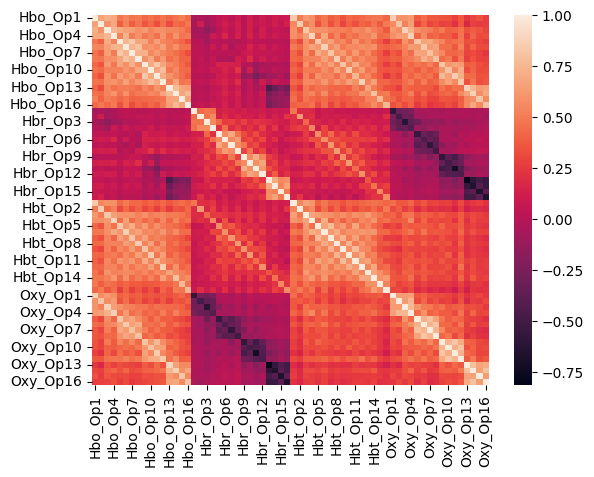

In [6]:
sns.heatmap(pd.DataFrame(X).corr())
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Train Test Split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Standard Scaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [11]:
scaled_df = pd.DataFrame(Xtrain_scaled, columns = X.columns)
scaled_df.head()

,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,Hbo_Op10,...,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16
0,-1.776161,-2.053333,-1.875134,-1.231261,-1.849703,-2.234118,-1.719632,-1.363498,-2.311888,-1.897975,...,-1.061666,-0.864779,-2.004185,-1.815317,-1.396707,-2.283046,-1.388528,-1.903784,-1.271191,-0.662882
1,0.013548,-0.102743,-0.262490,-0.278298,-0.384308,-0.900896,-0.831991,-1.281766,-0.150167,-1.069292,...,-0.232511,-1.061251,0.415467,-0.789823,1.724257,-0.288222,0.686301,0.271971,0.012391,0.002814
2,0.013515,0.192006,-0.022309,-0.231605,0.233090,0.852206,1.185972,1.582665,0.917487,0.683477,...,1.151300,0.746394,0.356433,0.096023,0.257907,0.344192,0.743925,0.447148,1.047499,0.834538
3,-0.565626,-0.482875,-1.003307,-1.658148,-1.061701,-2.051237,-0.562221,-0.788678,0.880847,0.128501,...,-0.600945,0.008166,0.803625,1.105200,0.396402,-0.116925,1.530004,0.924883,0.551337,2.726017
4,0.204950,0.003109,0.208064,0.280557,0.665538,0.585323,0.308734,1.096009,0.775357,0.295104,...,0.096203,0.629544,1.145441,1.281455,1.055772,1.097297,1.312754,1.750804,0.029914,0.025746


In [12]:
from sklearn.decomposition import PCA

In [19]:
# PCA
pca = PCA(n_components = 0.95)
Xtrain_pca = pca.fit_transform(Xtrain_scaled)
Xtest_pca = pca.transform(Xtest_scaled)

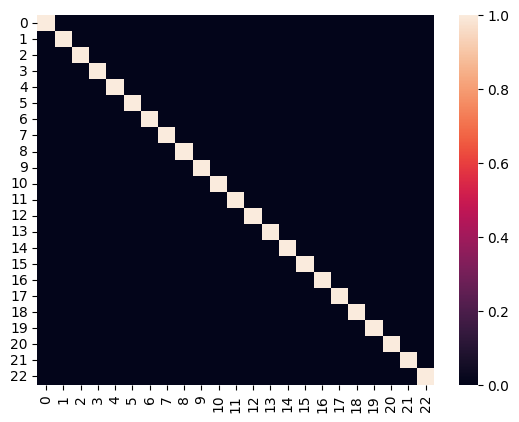

In [20]:
sns.heatmap(pd.DataFrame(Xtrain_pca).corr())
plt.show()

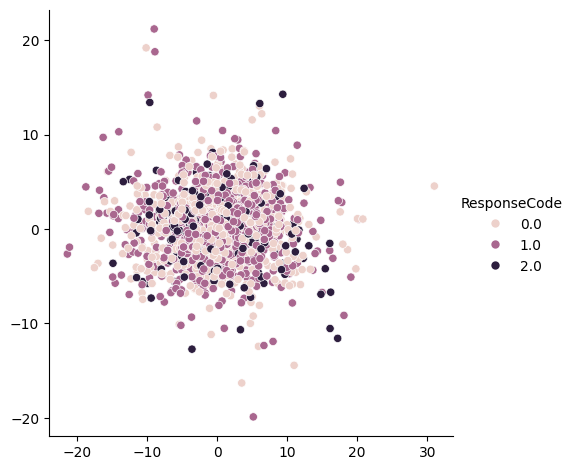

In [21]:
sns.relplot(x=Xtrain_pca[:,0], y=Xtrain_pca[:,1], hue=ytrain)

# With PCA

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble        import RandomForestClassifier

In [23]:
# Grid Search for Random Forest Classifier
RFC = RandomForestClassifier()

paramsRF = {
    'n_estimators':[50, 100, 500, 1000],
    'max_depth': [10, 20, 30]
}

gridRFR = GridSearchCV(estimator = RFC, param_grid = paramsRF, cv = 5, verbose = 3, refit = True, n_jobs = -1)

gridRFR.fit(Xtrain_pca, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.433 total time=   1.0s
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.433 total time=   1.1s
[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.467 total time=   1.1s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.443 total time=   1.1s
[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.476 total time=   1.1s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.447 total time=   2.3s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.449 total time=   2.5s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.428 total time=   2.5s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.446 total time=   3.2s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.473 total time=   3.4s
[CV 2/5] END ....max_depth=10, n_estimators=500;, score=0.407 total time=  12.8s
[CV 3/5] END ....max_depth=10, n_estimators=500;

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [24]:
best_params = gridRFR.best_params_
print(best_params)

{'max_depth': 10, 'n_estimators': 50}


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
prediction = gridRFR.predict(Xtest_pca)

In [27]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['0.0', '1.0', '2.0']))

              precision    recall  f1-score   support

         0.0       0.41      0.34      0.37       465
         1.0       0.45      0.65      0.53       510
         2.0       0.00      0.00      0.00       150

    accuracy                           0.44      1125
   macro avg       0.29      0.33      0.30      1125
weighted avg       0.37      0.44      0.40      1125

[[0 0 0]
 [0 0 0]
 [0 0 0]]


/Users/caginsenemoglu/Desktop/Development/Personal Projects/AI-Individual/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caginsenemoglu/Desktop/Development/Personal Projects/AI-Individual/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caginsenemoglu/Desktop/Development/Personal Projects/AI-Individual/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in la

# Without PCA

In [28]:
# Grid Search for Random Forest Classifier
RFC = RandomForestClassifier()

paramsRF = {
    'n_estimators':[50, 100, 500, 1000],
    'max_depth': [10, 20, 30]
}

gridRFR = GridSearchCV(estimator = RFC, param_grid = paramsRF, cv = 5, verbose = 3, refit = True, n_jobs = -1)

gridRFR.fit(Xtrain_scaled, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.696 total time=   1.7s
[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.704 total time=   1.7s
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.667 total time=   1.7s
[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.704 total time=   1.8s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.701 total time=   1.8s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.704 total time=   3.9s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.687 total time=   4.0s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.702 total time=   4.0s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.696 total time=   3.7s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.681 total time=   3.7s
[CV 2/5] END ....max_depth=10, n_estimators=500;, score=0.695 total time=  16.6s
[CV 1/5] END ....max_depth=10, n_estimators=500;

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [29]:
best_params = gridRFR.best_params_
print(best_params)

{'max_depth': 30, 'n_estimators': 500}


In [30]:
prediction = gridRFR.predict(Xtest_scaled)

In [31]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['0.0', '1.0', '2.0']))

              precision    recall  f1-score   support

         0.0       0.70      0.67      0.69       465
         1.0       0.65      0.82      0.73       510
         2.0       0.95      0.27      0.42       150

    accuracy                           0.68      1125
   macro avg       0.77      0.59      0.61      1125
weighted avg       0.71      0.68      0.67      1125

[[0 0 0]
 [0 0 0]
 [0 0 0]]
